<a href="https://colab.research.google.com/github/nithinbadi/PyTorch-FashionMNIST/blob/main/pytorch_computer_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Pytorch computer vision

In [ ]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

torchvision.__version__

'0.16.0+cu121'

## Getting a dataset

In [ ]:
# setup training data
train_data = datasets.FashionMNIST(
    root="data",
    train=True,
    transform = ToTensor(),
    download=True,
    target_transform=None
)
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    transform=ToTensor(),
    download=True,
    target_transform = None
)

In [ ]:
len(train_data),len(test_data)

(60000, 10000)

In [ ]:
# See the first training example
image, label = train_data[0]
image,label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [ ]:
class_names = train_data.classes

In [ ]:
class_to_idx = train_data.class_to_idx

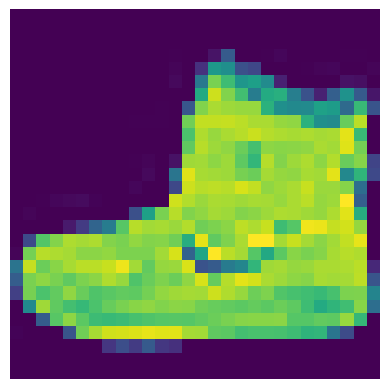

In [ ]:
import matplotlib.pyplot as plt
image,label = train_data[0]
plt.imshow(image.squeeze())
plt.axis('off');

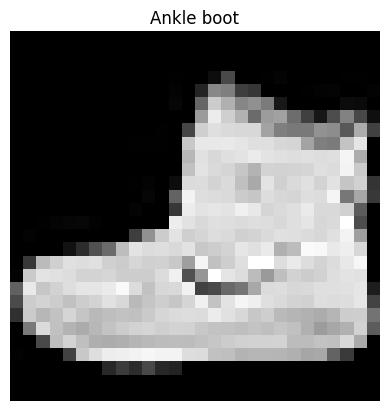

In [ ]:
plt.imshow(image.squeeze(), cmap="gray");
plt.title(class_names[label]);
plt.axis('off');

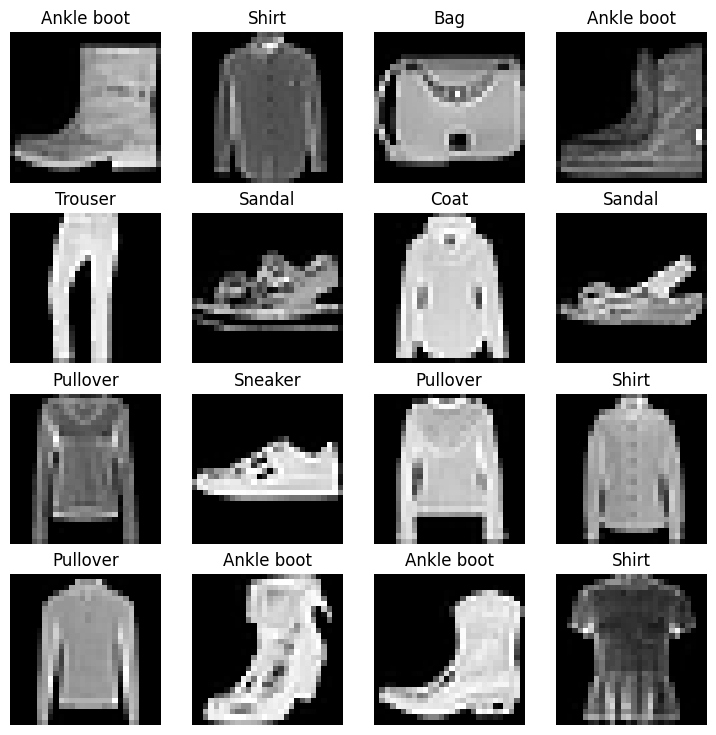

In [ ]:

torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows,cols = 4,4
for i in range(1,rows*cols+1):
  random_idx = torch.randint(0,len(train_data),size=[1,]).item()
  img,label=train_data[random_idx]
  fig.add_subplot(rows,cols,i)
  plt.imshow(img.squeeze(),cmap="gray")
  plt.title(class_names[label])
  plt.axis('off');



## prepare dataloader
1. It is more computationally efficient, as in, your computing hardware may not be able to look (store in memory) at 60000 images in one hit. So we break it down to 32 images at a time (batch size of 32)
2. It gives our neural network more chances to update its gradient per epoch.

In [ ]:
from torch.utils.data import DataLoader

#hyperparameter
BATCH_SIZE = 32

train_dataloader = DataLoader(train_data,batch_size=BATCH_SIZE,shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=BATCH_SIZE,shuffle=False)

In [ ]:
len(train_dataloader),len(test_dataloader)

(1875, 313)

In [ ]:
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
Label: 8, label size: torch.Size([])


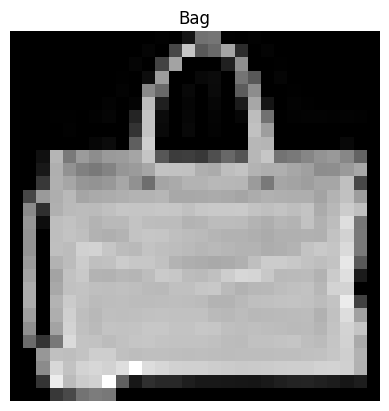

In [ ]:
#show a sample
#torch.manual_seed(79)
random_idx = torch.randint(0,len(train_features_batch),size = [1]).item()
img,label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(),cmap="gray")
plt.title(class_names[label])
plt.axis('off');
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

## Model 0: Build a baseline model

A baseline model is a simple model you will try and improve upon with subsequent models/ experiments.

In [ ]:
# create a flatten layer

flatten_layer = nn.Flatten()

x= train_features_batch[0]
output = flatten_layer(x)
#perform forward pass

print(f"Shape before flattening {x.shape}")
print(f"Shape after flattening { output.shape}")

Shape before flattening torch.Size([1, 28, 28])
Shape after flattening torch.Size([1, 784])


In [ ]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape, out_features=hidden_units),
        nn.Linear(in_features= hidden_units, out_features=output_shape )
    )

  def forward(self,x):
    return self.layer_stack(x)


In [ ]:
torch.manual_seed(42)
model_0 = FashionMNISTModelV0(
    input_shape=28*28,
    hidden_units=10,
    output_shape=len(class_names)
)
model_0.to("cpu")

model_0


FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

### setup loss, optimizer and evaluation metrics

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),lr=0.1)

## Creating helper functions
Two Additional helper functions -
- print_train_time
- accuracy_fn

In [ ]:
from timeit import default_timer

def print_train_time(start:float,end: float,device: torch.device= None):
  """
  Prints difference between start and end time. """
  total_time = end - start
  print(f"Train time on {device}: {total_time:.3f} seconds")
  return total_time

In [ ]:
def accuracy_fn(y_true: torch.Tensor,y_pred: torch.Tensor):
  true_p = len([n for n in torch.eq(y_true,y_pred) if n])
  total = len(y_true)
  return (true_p/total)*100

In [ ]:
accuracy_fn(torch.Tensor([1,1,1]),torch.Tensor([0,1,1]))

66.66666666666666

In [ ]:
from tqdm.auto import tqdm

torch.manual_seed(610)
train_time_start_on_cpu = default_timer()
EPOCHS = 3

#create a training loop
for epoch in tqdm(range(EPOCHS)):
  print(f"Epoch: {epoch}\n------")
  ###training
  train_loss = 0

  #add a loop to loop through the training batches
  for batch, (image,label) in enumerate(train_dataloader):
    model_0.train()
    #1. forward pass
    y_pred = model_0(image)

    #calculate loss(per batch)
    loss = loss_fn(y_pred,label)
    train_loss += loss

    #Optimizer zero grad
    optimizer.zero_grad()

    # Loss backward propogation
    loss.backward()

    #optimizer step
    optimizer.step()

    #print out what's happening
    if batch%400 ==0:
      print(f"Looked at {batch * len(image)}/{len(train_dataloader.dataset)}")

  #Divide total train loss by length of train dataloader
  train_loss/= len(train_dataloader)

  ##testing loop
  test_loss = 0
  model_0.eval()
  with torch.inference_mode():
    for image,label in test_dataloader:
      #forward pass
      test_pred = model_0(image)

      #calculate the loss
      test_loss += loss_fn(test_pred,label)

    # calculate the test loss average per batch
    test_loss /= len(test_dataloader)

  #print out whats happening
  print(f"\nTrain loss: {train_loss:.4f} | Test loss: {test_loss:.4f}")

train_time_end_on_cpu = default_timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu,
                                            end=train_time_end_on_cpu,
                                            device=str(next(model_0.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
------
Looked at 0/60000
Looked at 12800/60000
Looked at 25600/60000
Looked at 38400/60000
Looked at 51200/60000

Train loss: 0.5883 | Test loss: 0.5014
Epoch: 1
------
Looked at 0/60000
Looked at 12800/60000
Looked at 25600/60000
Looked at 38400/60000
Looked at 51200/60000

Train loss: 0.4760 | Test loss: 0.5020
Epoch: 2
------
Looked at 0/60000
Looked at 12800/60000
Looked at 25600/60000
Looked at 38400/60000
Looked at 51200/60000

Train loss: 0.4532 | Test loss: 0.4689
Train time on cpu: 28.295 seconds


### Make predictions and get model 0 results

In [ ]:
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"


In [ ]:
torch.manual_seed(610)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device=device):
  loss,acc = 0,0
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for X,y in data_loader:
      X,y = X.to(device),y.to(device)
      y_pred = model(X)

      #Accumulate the loss values per batch
      loss+=loss_fn(y_pred,y)
      acc += accuracy_fn(y_true=y,
                         y_pred=y_pred.argmax(dim=1))
    #scale the loss and acc to find the average loss/acc per batch
    loss /= len(data_loader)
    acc /= len(data_loader)

  return {"model_name":model.__class__.__name__, # only works when model is built with the class
          "model_loss": loss.item(),
          "model_acc": acc}

#Calculate model 0 results on test dataset
model_0_results = eval_model(model_0,data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn)
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.4689299762248993,
 'model_acc': 83.67611821086263}

## Turning on the GPU

In [ ]:
import torch
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device


'cuda'

In [ ]:
!nvidia-smi

Mon Mar 11 10:10:35 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   71C    P0              31W /  70W |    151MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import torch.nn as nn
class FashionMNISTModelV1(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=output_shape),
        nn.ReLU()
    )

  def forward(self, x: torch.Tensor):
    return self.layer_stack(x)




In [ ]:

torch.manual_seed(79)
model_1 = FashionMNISTModelV1(input_shape=784,
                              hidden_units=10,
                              output_shape=len(class_names)).to(device) # send to gpu if it's available


In [ ]:
model_1.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[-0.0235, -0.0177,  0.0232,  ...,  0.0218,  0.0164, -0.0294],
                      [-0.0048,  0.0239, -0.0179,  ..., -0.0145, -0.0139,  0.0258],
                      [-0.0085, -0.0195, -0.0167,  ...,  0.0023, -0.0012,  0.0069],
                      ...,
                      [ 0.0140,  0.0061, -0.0189,  ...,  0.0230,  0.0140, -0.0049],
                      [-0.0161,  0.0059,  0.0024,  ...,  0.0290, -0.0014,  0.0037],
                      [-0.0132,  0.0250, -0.0280,  ...,  0.0256, -0.0244,  0.0178]],
                     device='cuda:0')),
             ('layer_stack.1.bias',
              tensor([-0.0040, -0.0153, -0.0342,  0.0198, -0.0295,  0.0338,  0.0248, -0.0230,
                       0.0202, -0.0334], device='cuda:0')),
             ('layer_stack.3.weight',
              tensor([[-0.0862,  0.0525,  0.0986,  0.0487, -0.3109, -0.2808,  0.2800,  0.2874,
                        0.1829, -0.2477],
                      [ 0

In [ ]:
next(model_1.parameters()).device

device(type='cuda', index=0)

In [ ]:
model_1_results = eval_model(
    model=model_1,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn,
    device=device
)
model_1_results

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 2.299982786178589,
 'model_acc': 12.140575079872205}

In [ ]:
loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.1)

In [ ]:
torch.manual_seed(79)
torch.cuda.manual_seed(79)

def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device:torch.device = device):
  """
  Performs a training with model trying to learn on data_loader
  """
  train_loss,train_acc=0,0

  model.train()

  for batch, (X,y) in tqdm(enumerate(dataloader)):
    #put target on target device
    X,y = X.to(device),y.to(device)
    #forward pass
    y_pred = model(X) # output raw logits

    #calculate the loss
    loss= loss_fn(y_pred,y)
    train_acc += accuracy_fn(y,y_pred.argmax(dim=1))
    train_loss +=loss.item()
    #optimizer zero grad
    optimizer.zero_grad()

    #loss backward
    loss.backward()

    #optimizer step
    optimizer.step()
  train_loss/=len(dataloader)
  train_acc/=len(dataloader)

  print(f"Train Loss: {train_loss:.5f} | Train acc: {train_acc:.2f}%")




In [ ]:
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device:torch.device = device):
  """
  Perform a testing loop on model going over data loader
  """
  test_loss,test_acc = 0,0
  model.eval()

  with torch.inference_mode():
    for X,y in tqdm(dataloader):
      X,y = X.to(device), y.to(device)

      #forward pass(output raw logits)
      test_pred = model(X)


      #calculate the loss/acc
      loss = loss_fn(test_pred, y)
      test_acc += accuracy_fn(y,test_pred.argmax(dim=1))
      test_loss+=loss.item()

    test_loss/=len(dataloader)
    test_acc/=len(dataloader)

    print(f"Test Loss: {test_loss:.5f} | Test acc: {test_acc:.2f}%")

In [ ]:
from timeit import default_timer as timer
EPOCHS = 3
torch.manual_seed(79)
torch.cuda.manual_seed(79)
train_time_start_on_gpu = timer()
for epoch in tqdm(range(EPOCHS)):
  print(f'Epoch: {epoch}\n---------')
  train_step(model = model_1,dataloader = train_dataloader
             ,loss_fn= loss_fn,optimizer = optimizer,
             accuracy_fn=accuracy_fn)
  test_step(model = model_1,dataloader= test_dataloader,loss_fn= loss_fn,accuracy_fn = accuracy_fn)


train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(train_time_start_on_gpu,train_time_end_on_gpu,device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------


0it [00:00, ?it/s]

Train Loss: 1.21223 | Train acc: 58.41%


  0%|          | 0/313 [00:00<?, ?it/s]

Test Loss: 1.08870 | Test acc: 61.79%
Epoch: 1
---------


0it [00:00, ?it/s]

Train Loss: 1.08473 | Train acc: 62.33%


  0%|          | 0/313 [00:00<?, ?it/s]

Test Loss: 1.09175 | Test acc: 62.06%
Epoch: 2
---------


0it [00:00, ?it/s]

Train Loss: 1.05932 | Train acc: 62.86%


  0%|          | 0/313 [00:00<?, ?it/s]

Test Loss: 1.05979 | Test acc: 62.84%
Train time on cuda: 34.876 seconds


##Model 2 CNN building

In [ ]:
# create a convolutional network
class FashionMNISTModelV2(nn.Module):
  """
  Model architecture that replicates the TinyVGG
  model from CNN explainer website
  """
  def __init__(self,
               input_shape:int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7,
                  out_features=output_shape)
    )

  def forward(self,x:torch.Tensor):
    x = self.conv_block_1(x)
    #print(f"Output shape of conv_block_1: {x.shape}")
    x = self.conv_block_2(x)
    #print(f"Output shape of conv_block_2: {x.shape}")
    x = self.classifier(x)
    # print(f"Output shape of classifier: {x.shape}")

    return x

In [ ]:
torch.manual_seed(79)
model_2 = FashionMNISTModelV2(input_shape=1,
                              hidden_units=10,
                              output_shape=len(class_names)).to(device)

In [ ]:
image.shape

torch.Size([16, 1, 28, 28])

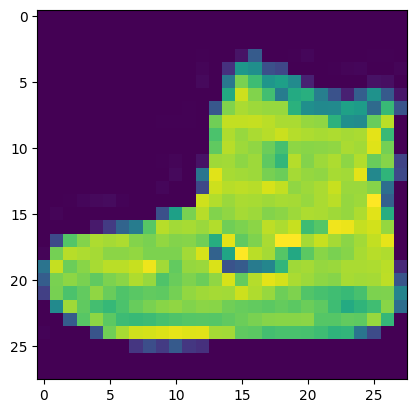

In [ ]:
import matplotlib.pyplot as plt
image,label = train_data[0]
plt.imshow(image.squeeze())

In [ ]:
model_2(image.unsqueeze(0).to(device))

tensor([[-9.3864e-03, -1.2961e-02,  4.5861e-02, -4.8551e-03,  3.0303e-02,
          4.9046e-02,  1.8361e-02, -3.4088e-03,  1.5980e-03, -4.1749e-05]],
       device='cuda:0', grad_fn=<AddmmBackward0>)

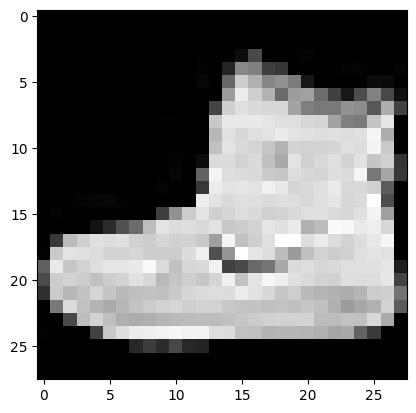

In [ ]:
plt.imshow(image.squeeze(),cmap="gray")

### Setup a loss function and optimizer for model_2

In [ ]:
loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.1)

In [ ]:
epochs = 3
torch.manual_seed(79)
torch.cuda.manual_seed(79)

from timeit import default_timer as timer

train_time_start_model_2=timer()

for epoch in tqdm(range(epochs)):
  print(f"Epoch {epoch}:\n ------------")
  train_step(
      model=model_2,
      dataloader=train_dataloader,
      loss_fn=loss_fn,
      optimizer=optimizer,
      accuracy_fn=accuracy_fn,
      device=device
  )
  test_step(
      model=model_2,
      dataloader=test_dataloader,
      loss_fn=loss_fn,
      accuracy_fn=accuracy_fn,
      device=device
  )
train_time_end_model_2=timer()
total_train_time_model_2 = print_train_time(train_time_start_model_2,train_time_end_model_2,device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch 0:
 ------------


0it [00:00, ?it/s]

Train Loss: 0.60115 | Train acc: 78.36%


  0%|          | 0/313 [00:00<?, ?it/s]

Test Loss: 0.40121 | Test acc: 85.12%
Epoch 1:
 ------------


0it [00:00, ?it/s]

Train Loss: 0.35201 | Train acc: 87.35%


  0%|          | 0/313 [00:00<?, ?it/s]

Test Loss: 0.37364 | Test acc: 86.00%
Epoch 2:
 ------------


0it [00:00, ?it/s]

Train Loss: 0.31009 | Train acc: 88.80%


  0%|          | 0/313 [00:00<?, ?it/s]

Test Loss: 0.30708 | Test acc: 88.86%
Train time on cuda: 40.844 seconds


In [ ]:
model_2_results = eval_model(
    model=model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn,
    device=device
)
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3070796728134155,
 'model_acc': 88.85782747603834}

In [ ]:
import pandas as pd

compare_results = pd.DataFrame([model_0_results,model_1_results,model_2_results])
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.468930,83.676118
1,FashionMNISTModelV1,2.299983,12.140575
2,FashionMNISTModelV2,0.307080,88.857827


In [ ]:
compare_results["training_time"]=[total_train_time_model_0,
                                  total_train_time_model_1,
                                  total_train_time_model_2]
compare_results

,model_name,model_loss,model_acc,training_time
0,FashionMNISTModelV0,0.468930,83.676118,28.294735
1,FashionMNISTModelV1,2.299983,12.140575,34.876357
2,FashionMNISTModelV2,0.307080,88.857827,40.843766


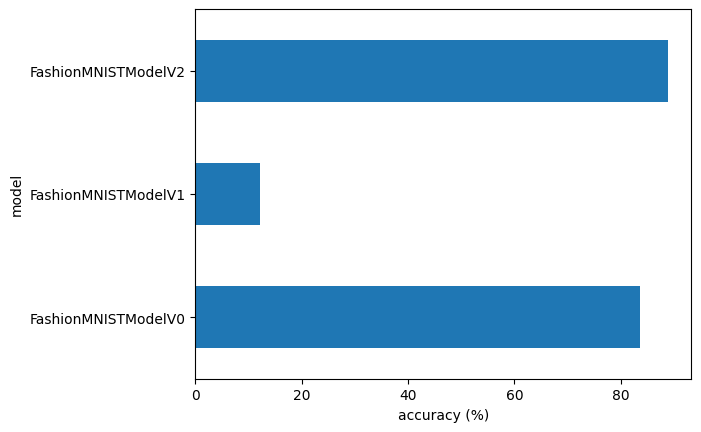

In [ ]:
# Visualize our model results
compare_results.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel("accuracy (%)")
plt.ylabel("model");

#make some random sample predictions with  the test dataset with the best model


In [ ]:
def make_predictions(model: torch.nn.Module,
                      data:list,
                      device:torch.device = device):
  pred_probs = []
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for sample in data:
      sample = torch.unsqueeze(sample,dim=0).to(device)

      #forward pass
      pred_logits = model(sample)

      #get prediction probability
      pred_prob = torch.softmax(pred_logits.squeeze(),dim=0)

      #get pred_prob off the GPU for further calculations
      pred_probs.append(pred_prob.cpu())


  #Stack the pred_probs to turn list into tensor
  return torch.stack(pred_probs).argmax(dim=1)


In [ ]:
import random
# random.seed(79)

test_samples = []
test_labels = []

for sample,label in random.sample(list(test_data), k=9):
  test_samples.append(sample)
  test_labels.append(label)

test_samples[0].shape

torch.Size([1, 28, 28])

In [ ]:
pred_probs = make_predictions(model=model_2,
                              data=test_samples)
pred_probs

tensor([3, 8, 2, 9, 0, 9, 8, 6, 8])

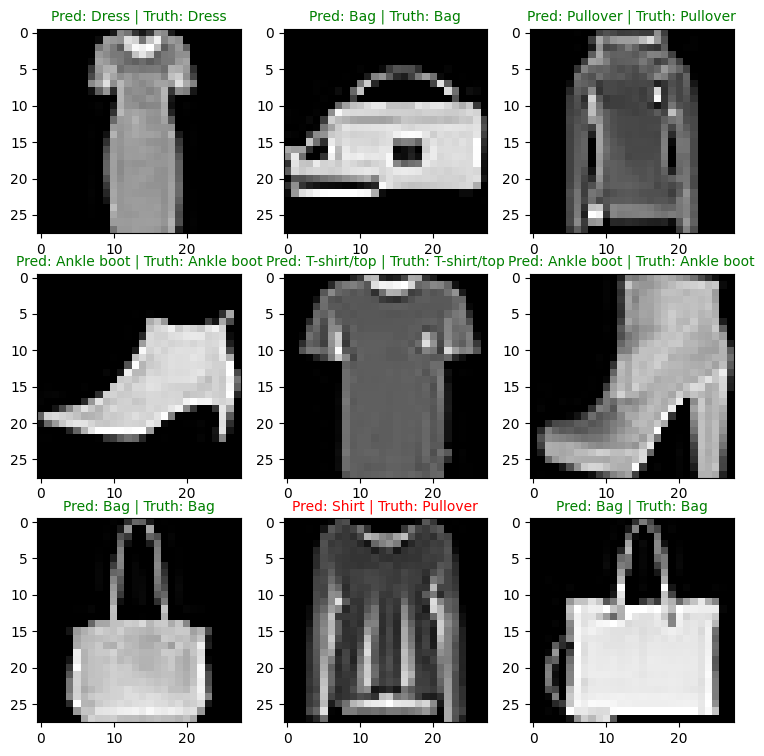

In [ ]:
plt.figure(figsize=(9,9))
nrows,ncols=3,3
for i, sample in enumerate(test_samples):
  #create a subplot
  plt.subplot(nrows,ncols,i+1)

  #plot the target image
  plt.imshow(sample.squeeze(),cmap='gray')

  #find prediction in text form
  pred_label = class_names[pred_probs[i]]

  # find the truth label
  truth_label = class_names[test_labels[i]]

  #create title text
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"

  #get visual -> green for correct label and red for incorrect label
  if pred_label==truth_label:
    plt.title(title_text,fontsize=10,c="g")
  else:
    plt.title(title_text,fontsize=10,c="r")

### 10. Making a confusion matrix

1. Make a predictions with our model on the test data
2. Use torchmetrics to make a confusion matrix
3. Plot the confusion matrix using `mlextend confusion matrix`

In [ ]:
# import tqdm.auto
from tqdm.auto import tqdm

#make predictions with trained model
y_preds = []
model_2.eval()
with torch.inference_mode():
  for X,y in tqdm(test_dataloader, desc="Making predictions...."):
    #send data and targets to target device
    X,y = X.to(device),y.to(device)

    #do the forward pass
    y_logit = model_2(X)

    #turn predictions from logits -> prediction probabilities -> prediction labels
    y_pred = torch.softmax(y_logit.squeeze(),dim=0).argmax(dim=1)

    #put the predictions on the cpu for evaluation
    y_preds.append(y_pred.cpu())

#concatenate list of predictions into a tensor
y_pred_tensor = torch.cat(y_preds)
y_pred_tensor

Making predictions....:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([9, 2, 1,  ..., 0, 3, 0])

In [ ]:
y_pred_tensor.size()

torch.Size([10000])

In [ ]:
try:
  import torchmetrics, mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")
  assert int(mlxtend.__version__.split(".")[1])>=19, "mlxtend version should be 0.19.0 or higher"
except:
  !pip install torchmetrics -U mlxtend
  import torchmetrics, mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 840.4/840.4 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 19.4 MB/s eta 0:00:00
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.22.0
    Uninstalling mlxtend-0.22.0:
      Successfully uninstalled mlxtend-0.22.0
mlxtend version: 0.23.1


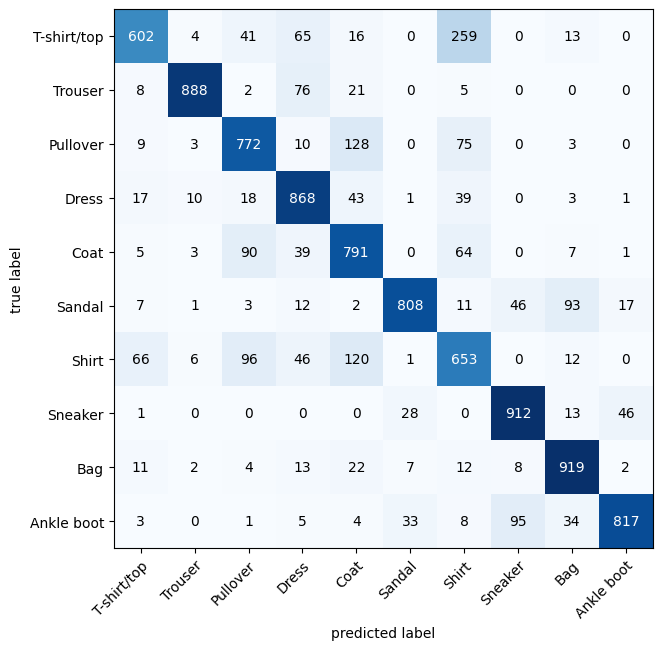

In [ ]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# setup confusion instance and compare predictions to targets
confmat = ConfusionMatrix(task='multiclass',num_classes=len(class_names))

confmat_tensor = confmat(preds=y_pred_tensor,
                         target=test_data.targets)

# PLot the confusion matrix
fig,ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(),
    class_names=class_names,
    figsize=(10,7)
)


In [ ]:
from pathlib import Path

MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents=True,exist_ok=True)
MODEL_NAME='03_pytorch_computer_vision_model_2.pth'
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_2.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: models/03_pytorch_computer_vision_model_2.pth


In [ ]:
#Create new instance

torch.manual_seed(610)

loaded_model_2 = FashionMNISTModelV2(input_shape=1,
                                     hidden_units=10,
                                     output_shape=len(class_names))

loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

#send model to target device
loaded_model_2.to(device)

FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [ ]:
#evaluate model
torch.manual_seed(610)
loaded_model_2_results=eval_model(
    model=loaded_model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn,
    device=device
)

In [ ]:
loaded_model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3070796728134155,
 'model_acc': 88.85782747603834}

In [ ]:
model_2_2_results=eval_model(
    model=model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn,device=device
)

In [ ]:
model_2_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3070796728134155,
 'model_acc': 88.85782747603834}